
# DS3010: Introduction to Machine Learning Lab – Week 2  
## **Introduction to Pandas and SciPy**  
**Name:** Parv Patel  
**Lab:** Week 2 – Pandas & SciPy  
**Objective:** Practice fundamental data handling using Pandas and basic scientific computing using SciPy.


## 1. Basics of Pandas


### 1(a) – Create a DataFrame from the given dictionary  
**Given Data:**
```python
data = {
 'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'Age': [25, 30, 35, 40, 45],
 'Department': ['HR', 'Engineering', 'Marketing', 'Engineering', 'HR'],
 'Salary': [50000, 80000, 60000, 85000, 52000]
}
```


In [15]:

import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 45],
    'Department': ['HR', 'Engineering', 'Marketing', 'Engineering', 'HR'],
    'Salary': [50000, 80000, 60000, 85000, 52000]
}

df = pd.DataFrame(data)
df


,Name,Age,Department,Salary
0,Alice,25,HR,50000
1,Bob,30,Engineering,80000
2,Charlie,35,Marketing,60000
3,David,40,Engineering,85000
4,Eva,45,HR,52000


### 1(b) – Display the first 3 rows of the DataFrame

In [16]:
df.head(3)

,Name,Age,Department,Salary
0,Alice,25,HR,50000
1,Bob,30,Engineering,80000
2,Charlie,35,Marketing,60000


### 1(c) – Display data types of each column

In [17]:
df.dtypes

Name          object
Age            int64
Department    object
Salary         int64
dtype: object

### 1(d) – Summary statistics of numerical columns

In [18]:
df.describe()

,Age,Salary
count,5.000000,5.000000
mean,35.000000,65400.000000
std,7.905694,16149.303391
min,25.000000,50000.000000
25%,30.000000,52000.000000
50%,35.000000,60000.000000
75%,40.000000,80000.000000
max,45.000000,85000.000000


## 2. Students Performance Dataset Analysis


### 2(a) – Load `StudentsPerformance.csv` into a DataFrame


In [19]:

students_df = pd.read_csv("StudentsPerformance.csv")
students_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2(b) – Display dataset shape, column names, and data types

In [20]:

print("Shape:", students_df.shape)
print("\nColumn Names:", students_df.columns.tolist())
print("\nData Types:\n", students_df.dtypes)


Shape: (1000, 8)

Column Names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


### 2(c) – Check for missing values

In [21]:
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 2(d) – Compute mean, median, and standard deviation for Math score

In [22]:

mean_math = students_df['math score'].mean()
median_math = students_df['math score'].median()
std_math = students_df['math score'].std()

print(f"Mean Math Score: {mean_math:.2f}")
print(f"Median Math Score: {median_math:.2f}")
print(f"Standard Deviation: {std_math:.2f}")


Mean Math Score: 66.09
Median Math Score: 66.00
Standard Deviation: 15.16


### 2(e) – Identify which subject has the highest average score

In [23]:

avg_scores = {
    'Math': students_df['math score'].mean(),
    'Reading': students_df['reading score'].mean(),
    'Writing': students_df['writing score'].mean()
}

highest_subject = max(avg_scores, key=avg_scores.get)
print("Average scores:", avg_scores)
print("Subject with highest average:", highest_subject)


Average scores: {'Math': 66.089, 'Reading': 69.169, 'Writing': 68.054}
Subject with highest average: Reading


### 2(f) – Average score per subject grouped by gender

In [24]:

gender_grouped = students_df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_grouped


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### 2(g) – Correlation matrix among Math, Reading, and Writing scores

In [25]:

corr_matrix = students_df[['math score', 'reading score', 'writing score']].corr()
corr_matrix


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## 3. Basics of SciPy – Normal Distribution

Sample Mean: 50.20, Sample Std Dev: 10.02


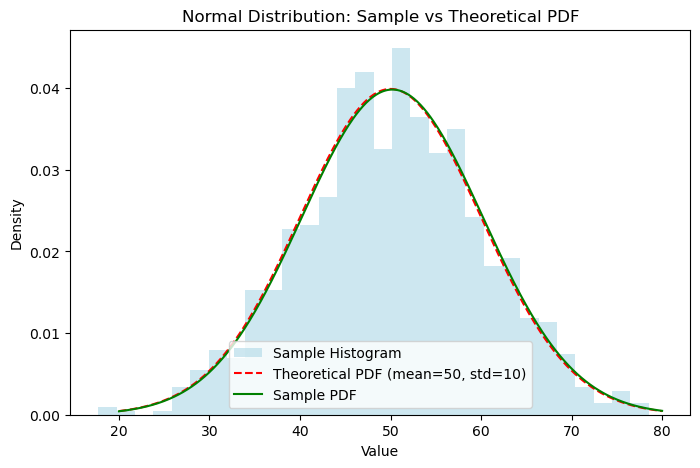

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 3(a) Generate random samples
mean, std = 50, 10
samples = np.random.normal(mean, std, 1000)

# 3(b) Compute sample statistics
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)
print(f"Sample Mean: {sample_mean:.2f}, Sample Std Dev: {sample_std:.2f}")

# 3(c) Plot histogram and overlay PDF
x = np.linspace(20, 80, 500)
plt.figure(figsize=(8,5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='lightblue', label='Sample Histogram')
plt.plot(x, norm.pdf(x, mean, std), 'r--', label='Theoretical PDF (mean=50, std=10)')
plt.plot(x, norm.pdf(x, sample_mean, sample_std), 'g', label='Sample PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution: Sample vs Theoretical PDF')
plt.legend()
plt.show()


## 4. SciPy – Euclidean Distance Between Two Sets of Points

Set A:
 [[46 30]
 [40 11]
 [45  5]
 [11  1]
 [42 48]]

Set B:
 [[12  7]
 [17 46]
 [41 32]
 [24 19]
 [33 44]]

Euclidean Distance Matrix:
 [[41.0487515  33.12099032  5.38516481 24.59674775 19.10497317]
 [28.28427125 41.88078318 21.02379604 17.88854382 33.73425559]
 [33.06055051 49.64876635 27.29468813 25.23885893 40.80441153]
 [ 6.08276253 45.39823785 43.13930922 22.20360331 48.3011387 ]
 [50.80354318 25.07987241 16.03121954 34.13209633  9.8488578 ]]

Closest pair: A0 [46 30] and B2 [41 32] with distance 5.39


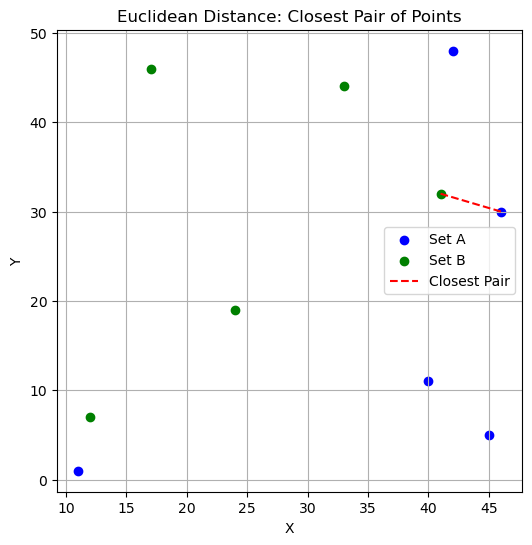

In [27]:

from scipy.spatial.distance import cdist

# (a) Generate two sets of random 2D points
A = np.random.randint(0, 50, size=(5, 2))
B = np.random.randint(0, 50, size=(5, 2))

print("Set A:\n", A)
print("\nSet B:\n", B)

# (b) Compute Euclidean distances
distances = cdist(A, B, metric='euclidean')
print("\nEuclidean Distance Matrix:\n", distances)

# (c) Identify closest pair
min_idx = np.unravel_index(np.argmin(distances), distances.shape)
closest_A, closest_B = A[min_idx[0]], B[min_idx[1]]
min_dist = distances[min_idx]
print(f"\nClosest pair: A{min_idx[0]} {closest_A} and B{min_idx[1]} {closest_B} with distance {min_dist:.2f}")

# (d) Plot sets and connect closest pair
plt.figure(figsize=(6,6))
plt.scatter(A[:,0], A[:,1], c='blue', label='Set A')
plt.scatter(B[:,0], B[:,1], c='green', label='Set B')
plt.plot([closest_A[0], closest_B[0]], [closest_A[1], closest_B[1]], 'r--', label='Closest Pair')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Euclidean Distance: Closest Pair of Points')
plt.legend()
plt.grid(True)
plt.show()


## 5. SciPy – Function Optimization

Convex function min at x = -0.7500, f(x) = 8.8750
Non-convex function min at x = 2.2500, f(x) = -6.5430


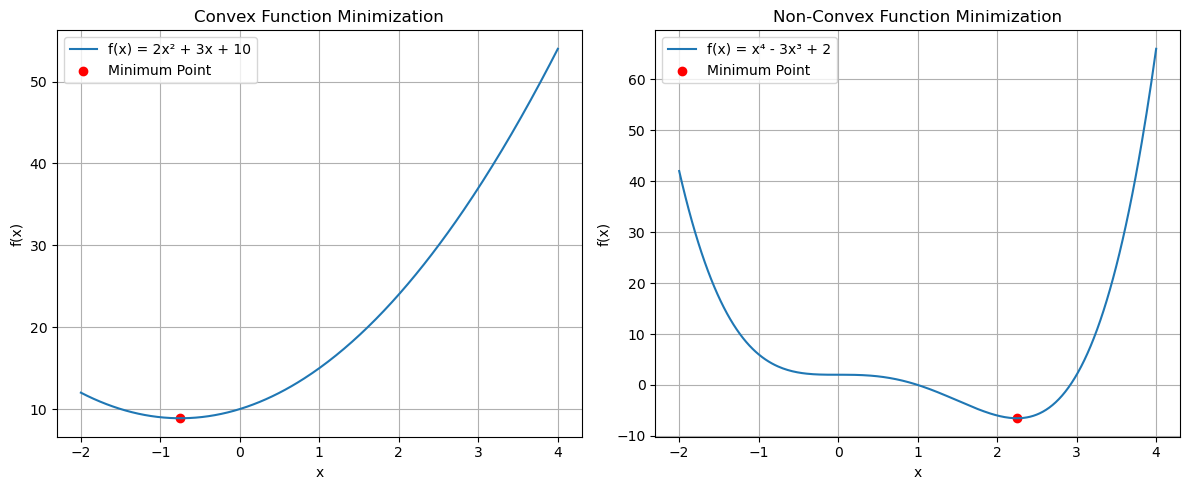

In [28]:

from scipy.optimize import minimize_scalar

# Define functions
f_convex = lambda x: 2*x**2 + 3*x + 10
f_nonconvex = lambda x: x**4 - 3*x**3 + 2

# (b) Minimize each function
res_convex = minimize_scalar(f_convex)
res_nonconvex = minimize_scalar(f_nonconvex)

# (c) Print minima
print(f"Convex function min at x = {res_convex.x:.4f}, f(x) = {res_convex.fun:.4f}")
print(f"Non-convex function min at x = {res_nonconvex.x:.4f}, f(x) = {res_nonconvex.fun:.4f}")

# (d) Plot both functions
x_vals = np.linspace(-2, 4, 300)

plt.figure(figsize=(12,5))
# Convex
plt.subplot(1,2,1)
plt.plot(x_vals, f_convex(x_vals), label='f(x) = 2x² + 3x + 10')
plt.scatter(res_convex.x, res_convex.fun, color='red', label='Minimum Point')
plt.title('Convex Function Minimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Non-convex
plt.subplot(1,2,2)
plt.plot(x_vals, f_nonconvex(x_vals), label='f(x) = x⁴ - 3x³ + 2')
plt.scatter(res_nonconvex.x, res_nonconvex.fun, color='red', label='Minimum Point')
plt.title('Non-Convex Function Minimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
